In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [12]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


# 분포: 모분포 vs 표본분포
- 표본의 분포는 표본의 크기가 클수록 모분포와 닮아가는 경향이 있다.
- 또한, 특정 값의 범위가 모분포에서 0.1이여도 표본에서는 비슷할 수도, 작을 수도, 상당히 커질 수도 있다.

In [13]:
# 모분포 만들기
uni=[-1,-1,0,0,0,0,0,1,1,1]

avg = sum(uni)/len(uni)
middle = 0 
var = np.around(np.var(uni),2)
std = np.around(np.std(uni),2)
aad = var_a(np.median(uni),uni)

print('모분포의 평균:',avg)
print('모분포의 중앙값:',middle)
print('모분포의 분산:',var)
print('모분포의 표준편차:',std)
print('모분포의 평균절대편차:',aad)

모분포의 평균: 0.1
모분포의 중앙값: 0
모분포의 분산: 0.49
모분포의 표준편차: 0.7
모분포의 평균절대편차: 0.5


모집단에서 표본 3으로 추출했을 때, 가능한 모든 결과를 나열하여 만들어 보자.

In [14]:
from itertools import product
sample_list=[]
sample_list=list(product(set(uni),set(uni),set(uni)))

In [15]:
sample_df=pd.DataFrame(columns=['x1','x2','x3','확률','평균','중앙값','분산','표준편차','평균절대편차'])
#sample_df

In [16]:
for idx in range(len(sample_list)):
  x1 = sample_list[idx][0]
  x2 = sample_list[idx][1]
  x3 = sample_list[idx][2]

  x1_pro=uni.count(x1)/len(uni)
  x2_pro=uni.count(x2)/len(uni)
  x3_pro=uni.count(x3)/len(uni)

  # 관측치 대입
  sample_df.loc[idx,'x1'] = x1
  sample_df.loc[idx,'x2'] = x2
  sample_df.loc[idx,'x3'] = x3


  #확률 대입
  sample_df.loc[idx,'확률'] = np.around(x1_pro * x2_pro * x3_pro,3)

  #평균 대입
  sample_df.loc[idx,'평균'] = np.around(np.mean(sample_list[idx]),3)

  #중앙값 대입
  sample_df.loc[idx,'중앙값'] = np.median(sample_list[idx])

  #분산 대입
  sample_df.loc[idx,'분산'] = np.var(sample_list[idx])

  #표준편차값 대입
  sample_df.loc[idx,'표준편차'] = np.std(sample_list[idx])

  #평균절대편차값 대입
  sample_df.loc[idx,'평균절대편차'] = var_a(np.median(sample_list[idx]),sample_list[idx])


sample_df = sample_df.sort_values(['x1','x2','x3']).reset_index(drop=True)
sample_df

,x1,x2,x3,확률,평균,중앙값,분산,표준편차,평균절대편차
0,-1,-1,-1,0.008,-1,-1,0,0,0
1,-1,-1,0,0.02,-0.667,-1,0.222222,0.471405,0.333333
2,-1,-1,1,0.012,-0.333,-1,0.888889,0.942809,0.666667
3,-1,0,-1,0.02,-0.667,-1,0.222222,0.471405,0.333333
4,-1,0,0,0.05,-0.333,0,0.222222,0.471405,0.333333
5,-1,0,1,0.03,0,0,0.666667,0.816497,0.666667
6,-1,1,-1,0.012,-0.333,-1,0.888889,0.942809,0.666667
7,-1,1,0,0.03,0,0,0.666667,0.816497,0.666667
8,-1,1,1,0.018,0.333,1,0.888889,0.942809,0.666667
9,0,-1,-1,0.02,-0.667,-1,0.222222,0.471405,0.333333


위의 데이터프레임에서 보듯이 어떤 표본이 추출되었느냐에 따라 관측되는 통계치가 변한다.

표본 평균의 값이 -0.333 일 때, 그에 대한 확률은 0.012, 0.05, 0.012, 0.05, 0.05, 0.012 이다.

In [17]:
sample_df.loc[sample_df['평균']== -0.333,'확률'].values

array([0.012, 0.05, 0.012, 0.05, 0.05, 0.012], dtype=object)

In [18]:
sample_df.loc[sample_df['평균']== -0.333,'확률'].sum()

0.186

 표본평균이 -0.333일 때, 그 확률은 0.186이 된다. 이렇게 표본에 따라 변하는 표본평균의 값과 그 확률을 구할 수 있고, 이것이 표본 **평균의 분포**이다!!

In [19]:
mean_dev=sample_df.groupby(['평균'])['확률'].sum().reset_index()
mean_dev.T

,0,1,2,3,4,5,6
평균,-1.000,-0.667,-0.333,0.000,0.333,0.667,1.000
확률,0.008,0.060,0.186,0.305,0.279,0.135,0.027


모든 표본평균값에 대해 그 확률을 구하면 표본평균의 분포를 구할 수 있다. 가장 중요한 것은 분포를 얘기할 때는, 그것이 **확률변수**임을 기억해두자.

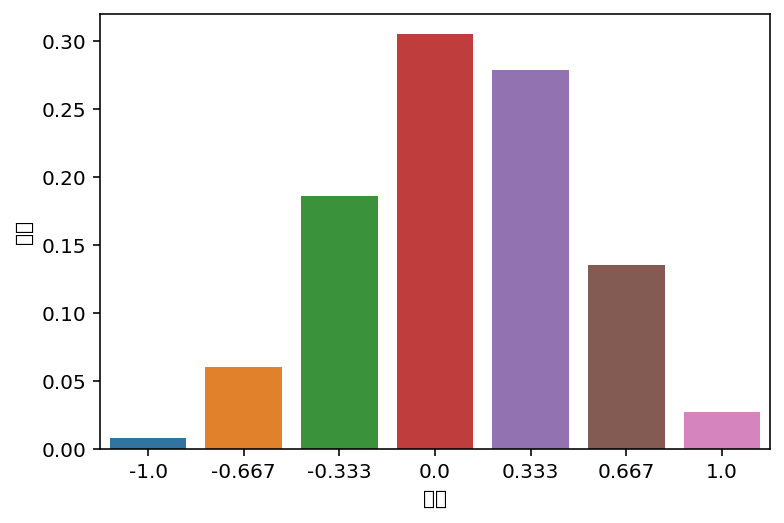

In [20]:
sns.barplot(mean_dev['평균'],mean_dev['확률'])

여기서 우리는 이것이 "분포"라는 것을 다시 한 번 주목하자. 어떤 분포에 대해서도 평균, 중앙값, 분산, 표준편차, 평균절대편차 등을 구할 수 있다.

In [21]:
md_mean = sum(mean_dev['평균']*mean_dev['확률'])
md_median = 0  # 누적확률분포로 생각해보면 0.5일 때 값은 0 이기 때문임
md_var = np.around(sum(((mean_dev['평균'] - md_mean)**2)*mean_dev['확률']),3) # ((관측치-평균)**2) * P
md_std = np.around(md_var**(1/2),3)
md_mad = np.around(sum(abs(mean_dev['평균'] - md_mean)*mean_dev['확률']),3)

In [22]:
print('표본평균의 평균',md_mean)
print('표본평균의 중앙값',md_median)
print('표본평균의 분산',md_var)
print('표본평균의 표준편차',md_std)
print('표본평균의 평균절대편차',md_mad)

표본평균의 평균 0.099994
표본평균의 중앙값 0
표본평균의 분산 0.163
표본평균의 표준편차 0.404
표본평균의 평균절대편차 0.332


- 표본평균의 분포에서 평균: 표본평균의 기댓값
 - 이것이 모평균과 일치하면, 표본평균이 평균적으로 모평균과 같음을 의미하고, 표본평균으로 모평균을 추정하는 것이 타당하다는 뜻.
 - 표본평균의 중앙값이 모평균과 같다는 것은 표본을 추출하여 평균을 구했을 때, 모평균보다 작을 확률과 클 확률이 정확히 반반이라는 뜻
- 표본평균의 산포측도: 표본평균의 분포가 얼마나 퍼져있는가를 나타냄
 - 산포측도가 크면, 주어진 표본에 따라 표본평균의 값이 크게 달라진다는 뜻이고, 표본평균의 값을 전적으로 믿을 수 없음을 의미함.
 ---

모분포를 아는 상태에서 표본평균을 쓰는 것은 불필요하다. 하지만, 일상에서는 모분포를 모르는 경우가 많다. 그런 경우 어떻게 진행해야할까?
- B 분포를 만들어서, 전과 함께 비교해보자.

In [23]:
uni_B = [-1,0,0,1,1,1,1,1,1,1]

In [24]:
from itertools import product
sample_list=[]
sample_list=list(product(set(uni_B),set(uni_B),set(uni_B)))

In [25]:
sample_df=pd.DataFrame(columns=['x1','x2','x3','확률','평균','중앙값','분산','표준편차','평균절대편차'])

In [26]:
for idx in range(len(sample_list)):
  x1 = sample_list[idx][0]
  x2 = sample_list[idx][1]
  x3 = sample_list[idx][2]

  x1_pro=uni_B.count(x1)/len(uni_B)
  x2_pro=uni_B.count(x2)/len(uni_B)
  x3_pro=uni_B.count(x3)/len(uni_B)

  # 관측치 대입
  sample_df.loc[idx,'x1'] = x1
  sample_df.loc[idx,'x2'] = x2
  sample_df.loc[idx,'x3'] = x3


  #확률 대입
  sample_df.loc[idx,'확률'] = np.around(x1_pro * x2_pro * x3_pro,3)

  #평균 대입
  sample_df.loc[idx,'평균'] = np.around(np.mean(sample_list[idx]),3)

  #중앙값 대입
  sample_df.loc[idx,'중앙값'] = np.median(sample_list[idx])

  #중앙값 대입
  sample_df.loc[idx,'분산'] = np.var(sample_list[idx])

  #표준편차값 대입
  sample_df.loc[idx,'표준편차'] = np.std(sample_list[idx])

  #평균절대편차값 대입
  sample_df.loc[idx,'평균절대편차'] = var_a(np.median(sample_list[idx]),sample_list[idx])


sample_df = sample_df.sort_values(['x1','x2','x3']).reset_index(drop=True)

In [27]:
mean_dev_B=sample_df.groupby(['평균'])['확률'].sum().reset_index()
mean_dev_B.T

,0,1,2,3,4,5,6
평균,-1.000,-0.667,-0.333,0.000,0.333,0.667,1.000
확률,0.001,0.006,0.033,0.092,0.231,0.294,0.343


In [28]:
mean_dev['확률B'] = mean_dev_B['확률']
mean_dev.rename(columns={'확률':'분포A',
                         '확률B':'분포B'},inplace=True)

In [29]:
mean_dev=pd.melt(mean_dev,id_vars=['평균'])

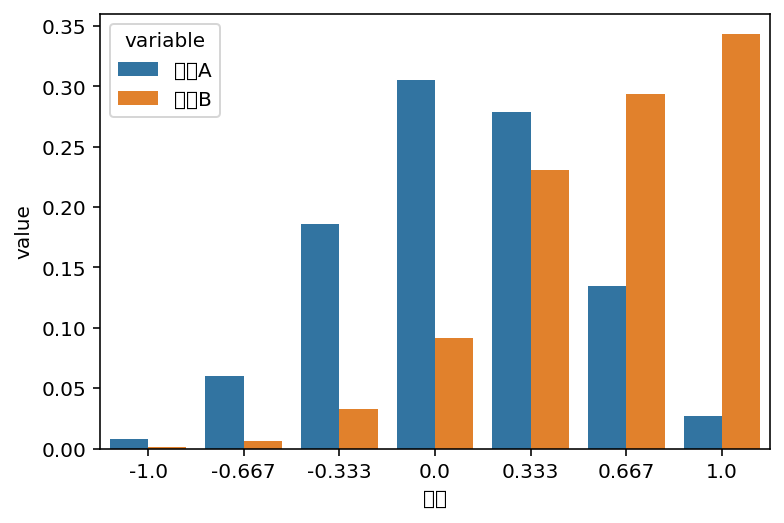

In [30]:
sns.barplot(mean_dev['평균'],mean_dev['value'],hue=mean_dev['variable'])

아까처럼, 분포B에서 크기 3의 표본을 추출 했을 때의 표본평균의 분포와 분포A의 표본평균의 분포를 비교하면 위의 그래프와 같다.

In [31]:
md_mean = sum(mean_dev_B['평균']*mean_dev_B['확률'])
md_median = 0  # 누적확률분포로 생각해보면 0.5일 때 값은 0 이기 때문임
md_var = np.around(sum(((mean_dev_B['평균'] - md_mean)**2)*mean_dev_B['확률']),3) # ((관측치-평균)**2) * P
md_std = np.around(md_var**(1/2),3)
md_mad = np.around(sum(abs(mean_dev_B['평균'] - md_mean)*mean_dev_B['확률']),3)

In [32]:
print('표본평균의 평균',md_mean)
print('표본평균의 중앙값',md_median)
print('표본평균의 분산',md_var)
print('표본평균의 표준편차',md_std)
print('표본평균의 평균절대편차',md_mad)

표본평균의 평균 0.6000300000000001
표본평균의 중앙값 0
표본평균의 분산 0.147
표본평균의 표준편차 0.383
표본평균의 평균절대편차 0.314


모분포의 모양이 다른 경우에도 표본 평균은 모평균의 값을 추정하기에 적절함. 하지만 모분포의 모양에 따라 표본평균의 구체적인 모양 및 산포측도가 달라진다.

모분포 A의 표본 평균 분포의 분산은 0.163이고, 모분포 B의 표본 평균 분포의 분산은 0.147로 모분포가 B인 경우에 표본 평균의 분포가 더 밀집되어 있음을 알 수 있다.